0.19947114020071635
242 242
2.287205484242752
1.9711966141788488
0.12978236278647995 0.11696492743435548
[[ 1.34204743 -0.21194061]
 [-0.21194061  1.10263708]]
(242, 242)


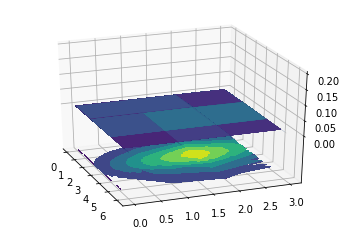

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv,det
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


data=pd.read_csv("heart.csv")
train=data.sample(frac=0.8,random_state=200) #random state is a seed value
test=data.drop(train.index)



class GMM:

    def __init__(self,X,Y):
        self.X = X
        self.Y= Y
        self.u1=0
        self.u2=0
        self.sig1=1
        self.sig2=1
        self.w1=1/2
        self.w2=1/2
    def run(self):
        a1=a2=self.w1/((2*np.pi*(self.sig1**2))**0.5)
        print(a1)

        l1=[]
        for i in self.X:
            q=(i-self.u1)**2/(2*self.sig1*self.sig1)
            #print(i,q,np.exp(-q))
            l1.append(a1*np.exp(-q))
        #print(l1)

        l2=[]
        for i in self.Y:
            q=(i-self.u2)**2/(2*self.sig2*self.sig2)
            #print(i,q,np.exp(-q))
            l2.append(a2*np.exp(-q))


        print(len(l2),len(l1))

        p1=[]
        p2=[]

        sum1=0
        sum2=0

        for i,j in zip(l1,l2):
            p1.append(i/(i+j))
            p2.append(j/(i+j))
            sum1+=i
            sum2+=j

        #print( p1, p2,sum1,sum2)

        #miu1
        miu1sum=0
        for i,j in zip(self.X,p1):
            miu1sum+=(j*(i-self.u1))
        miu1=miu1sum/sum1
        print(miu1)

        #miu2
        miu2sum=0
        for i,j in zip(self.Y,p2):
            miu2sum+=(j*(i-self.u2))
        miu2=miu2sum/sum2
        print(miu2)

        #weights
        w1n=sum1/len(l1)
        w2n=sum2/len(l2)
        print(w1n,w2n)

        #covariance matrix 
        cov_mat = np.stack((self.X, self.Y), axis = 0)  
        c_m=np.cov(cov_mat) 
        print(c_m)
        # Our 2-dimensional distribution will be over variables X and Y
        N = 242
        X1 = np.array(self.X)
        Y1 = np.array(self.Y)
        X1, Y1 = np.meshgrid(X1, Y1)

        # Mean vector and covariance matrix
        mu = np.array([miu1, miu2])
        Sigma = c_m
        print(X1.shape)

        # Pack X and Y into a single 3-dimensional array
        pos = np.empty(X1.shape + (2,))

        pos[:, :, 0] = X1
        pos[:, :, 1] = Y1

        def multivariate_gaussian(pos, mu, Sigma):
            """Return the multivariate Gaussian distribution on array pos.

            pos is an array constructed by packing the meshed arrays of variables
            x_1, x_2, x_3, ..., x_k into its _last_ dimension.

            """

            n = mu.shape[0]
            Sigma_det = np.linalg.det(Sigma)
            Sigma_inv = np.linalg.inv(Sigma)
            N = np.sqrt((2*np.pi)**n * Sigma_det)
            # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
            # way across all the input variables.
            fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

            return (w1n*w2n*np.exp(-fac / 2)) / N

        # The distribution on the variables X, Y packed into pos.
        Z = multivariate_gaussian(pos, mu, Sigma)
        #print(Z)
        # Create a surface plot and projected filled contour plot under it.
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_surface(X1, Y1, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.viridis)

        cset = ax.contourf(X1, Y1, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

        # Adjust the limits, ticks and view angle
        ax.set_zlim(-0.15,0.2)
        ax.set_zticks(np.linspace(0,0.2,5))
        ax.view_init(27, -21)

        plt.show()

        

GMM=GMM(train['oldpeak'],train['cp'])
GMM.run()
#GMM1=GMM(test['thal'],test['cp'])
#GMM1.run()